**Lets Grow More Virtual Internship Program December-2021**

**Beginner level Task**

**Name: Shaiz Akber**

**Iris Flowers Classification ML Project**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


# Data Analysis

In [ ]:
df.shape

(150, 5)

In [ ]:
features_nan=[features for features in df.isnull().sum()]
features_nan

[0, 0, 0, 0, 0]

In [ ]:
for features in df.columns:
    print(features,':',df[features].unique())

sepal.length : [5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]
sepal.width : [3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]
petal.length : [1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]
petal.width : [0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]
variety : ['Setosa' 'Versicolor' 'Virginica']


In [ ]:
continuous=[features for features in df.columns if df[features].dtypes=="float"]
continuous

['sepal.length', 'sepal.width', 'petal.length', 'petal.width']

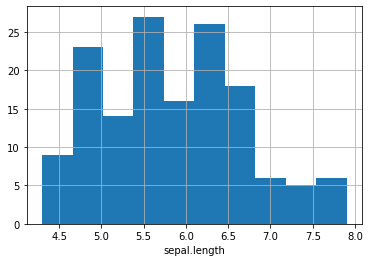

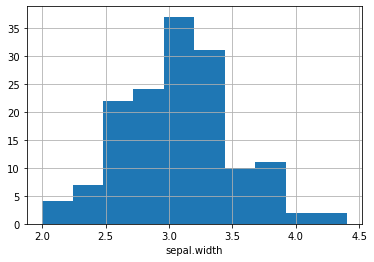

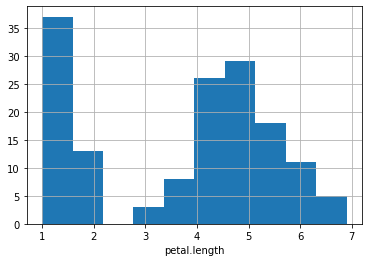

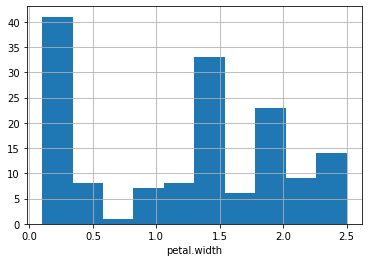

In [ ]:
for feature in continuous:
    plt.xlabel(feature)
    df[feature].hist(bins=10)
    plt.show()

<AxesSubplot:>

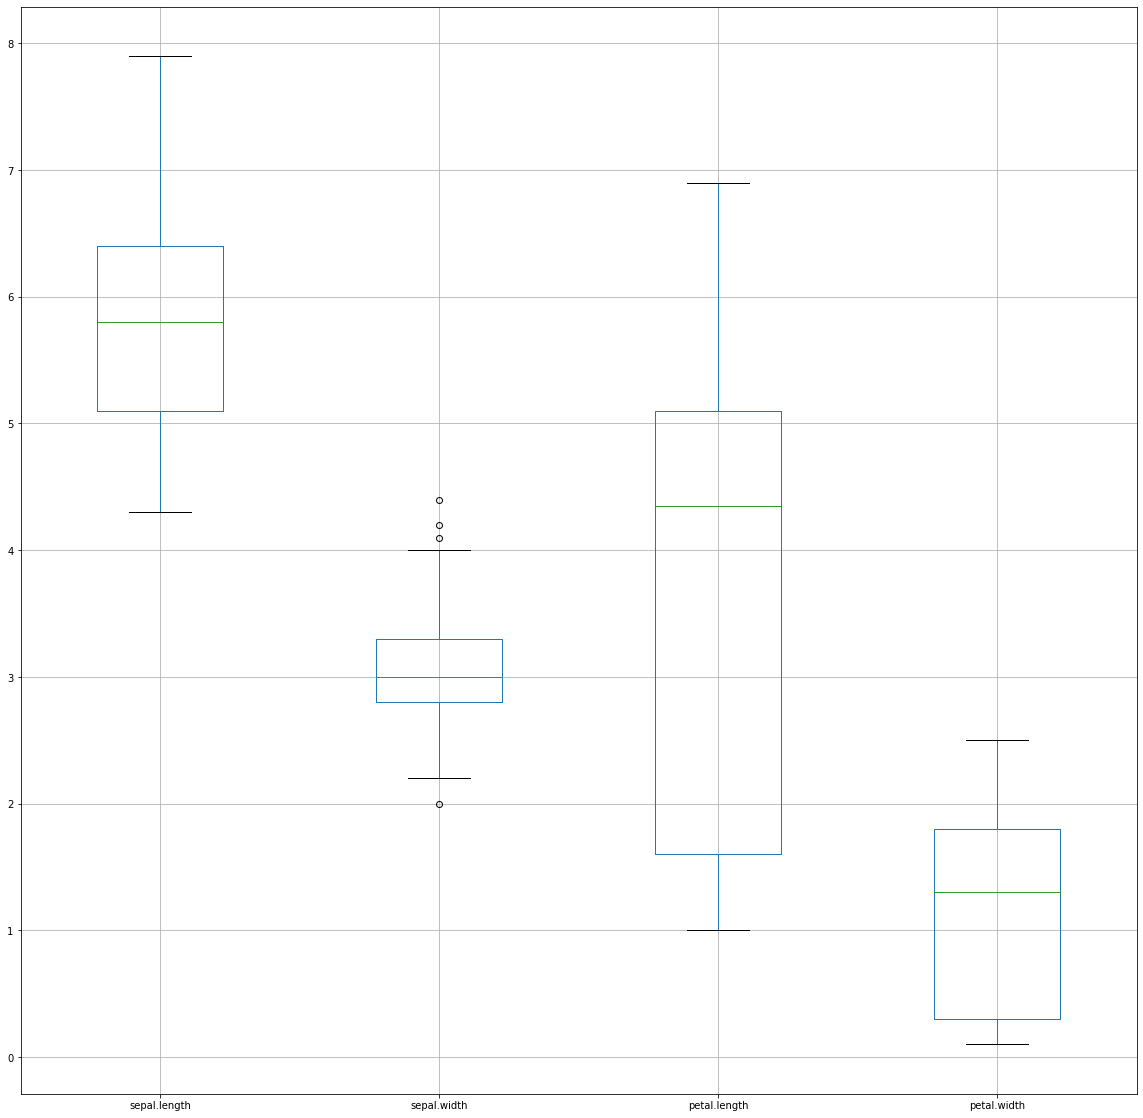

In [ ]:

plt.figure(figsize=(20,20))
df.boxplot(column=continuous)

<AxesSubplot:xlabel='variety', ylabel='count'>

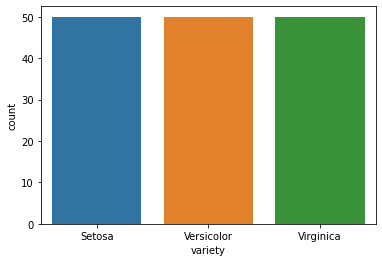

In [ ]:
sns.countplot(x='variety',data=df)

<AxesSubplot:>

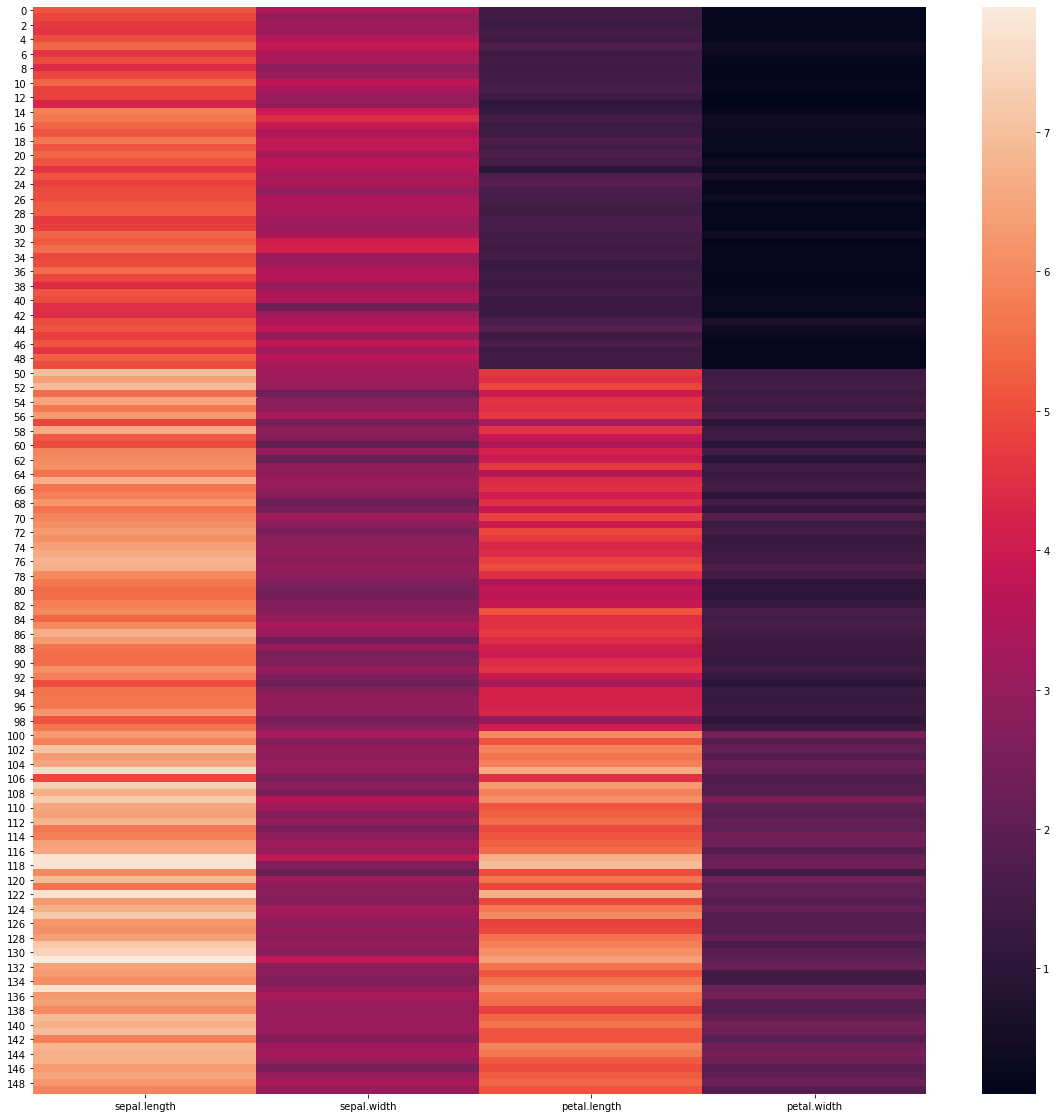

In [ ]:

plt.figure(figsize=(20,20))
sns.heatmap(df[continuous])


# Feature engineering

In [ ]:
IQR=df['sepal.width'].quantile(0.75)-df['sepal.width'].quantile(0.25)


In [ ]:
lower_bridge=df['sepal.width'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['sepal.width'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

2.05
4.05


(None, None)

In [ ]:
lower_bridge=df['sepal.width'].quantile(0.25)-(IQR*3)
upper_bridge=df['sepal.width'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

1.2999999999999998
4.8


(None, None)

In [ ]:
df.loc[df['sepal.width']>4.05,'sepal.width']=4.05


<AxesSubplot:>

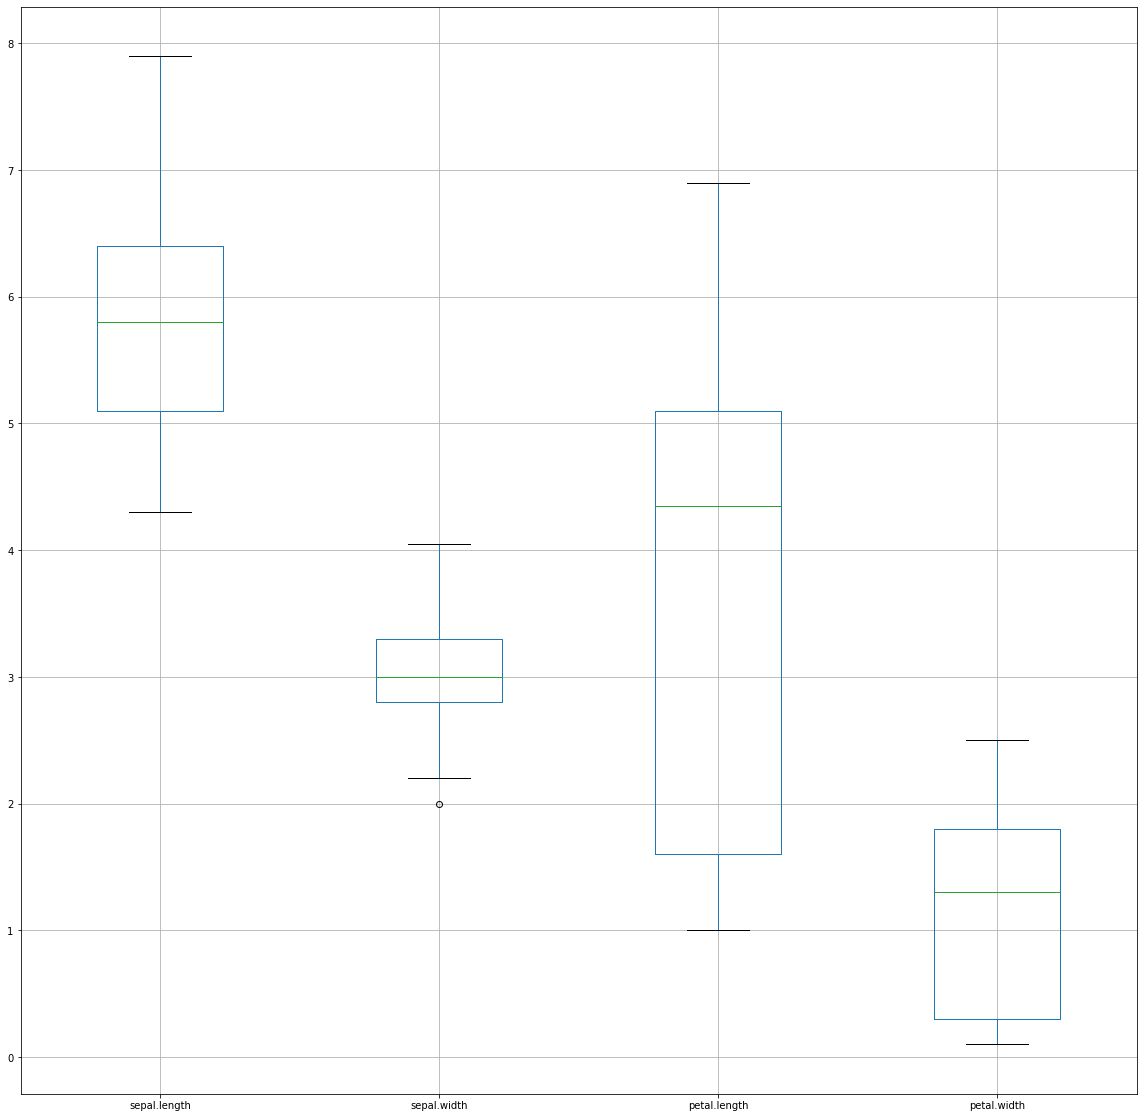

In [ ]:

plt.figure(figsize=(20,20))
df.boxplot(column=continuous)

In [ ]:
data=df.copy()

In [ ]:
for feature in continuous:
    data[feature+"log"]=np.log(data[feature])

In [ ]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety,sepal.lengthlog,sepal.widthlog,petal.lengthlog,petal.widthlog
0,5.1,3.5,1.4,0.2,Setosa,1.629241,1.252763,0.336472,-1.609438
1,4.9,3.0,1.4,0.2,Setosa,1.589235,1.098612,0.336472,-1.609438
2,4.7,3.2,1.3,0.2,Setosa,1.547563,1.163151,0.262364,-1.609438
3,4.6,3.1,1.5,0.2,Setosa,1.526056,1.131402,0.405465,-1.609438
4,5.0,3.6,1.4,0.2,Setosa,1.609438,1.280934,0.336472,-1.609438


In [ ]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
dic={
    'Setosa':0,
    'Versicolor':1,
    'Virginica':2
}

In [ ]:
df['variety']=df['variety'].map(dic)

In [ ]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.variety.unique()

array([0, 1, 2], dtype=int64)

In [ ]:
#indepented and dependent
y=df['variety']
X=df.drop('variety',axis=1)

# Model

In [ ]:
#### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier().fit(X_train,y_train)
prediction=rf_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
test=np.array([[6.1,2.8,4.7,1.2]])
rf_classifier.predict(test)

array([1], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='variety', ylabel='Density'>

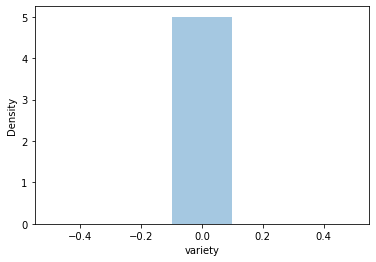

In [ ]:
sns.distplot(y_test-prediction)